## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

### Part 3: Finish the Solution Parse Part of Edit-Distance

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: 相对于方法一、方法二的随机生成，方法三穷举所有方向变化，梯度能够从一开就明确方向并一直朝这个方法变化。

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: Gredient即梯度（导数），损失函数的导数，能够直观的表达损失函数的变化趋势，Descent即下降，为了使我们的拟合函数与实际能够尽可能拟合，需要损失函数的局部最小值，需要通过Gredient来找到一个变化方向是损失函数持续Descent。


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 通过计算梯度，确定了损失函数的变化趋势，也就解决了方法三中方向不确定的问题，能够持续下降。

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 通过大量数据、重复运算，使计算机在运算过程中不断接近预期值并做到普遍适用，而且后续根据数据变化可以进行调整。

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

4. Can you catch up at least 3 problems which could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [1]:
import random
import matplotlib.pylab as plt

In [2]:
latitudes = [random.randint(-100, 100) for _ in range(10)]
longitude = [random.randint(-100, 100) for _ in range(10)]

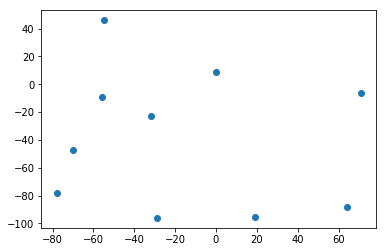

In [3]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [4]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [5]:
import matplotlib.pyplot as plt

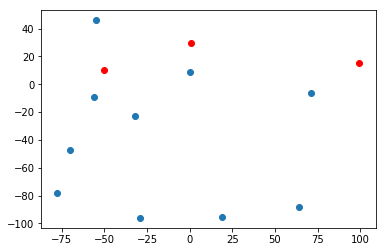

In [6]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro

In [7]:
# 初始化点
from collections import defaultdict
points = defaultdict(dict)
for index, _ in enumerate(latitudes):
    points[index] = (latitudes[index], longitude[index])

In [8]:
# 获取两点间距离
import math
def distance(p1, p2):
    if p1 is None or p2 is None : return 0
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

In [9]:
# 递归
def min_distance(start, points, choose):
    if len(choose) == len(points): return (distance(start, choose[-1]), [])
    
#     return min([distance(start, points[i]) + min_distance(points[i], points, choose + [points[i]]) for i in points if points[i] not in choose])
    r = []
    for i in points:
        if points[i] not in choose:
#             print(rec_lines(points[i], points, choose + [points[i]]))
            l, p = min_distance(points[i], points, choose + [points[i]])
            r.append((distance(start, points[i]) + l, [points[i]] + p))
    return min(r, key=lambda x: x[0])        

In [10]:
distance(chosen_p, points[1])

108.06016842481785

In [11]:
start = chosen_p
count_distance, lines = min_distance(start, points, [])

In [12]:
count_distance

476.2364503544812

In [13]:
print("->".join([str(p) for p in [start] + lines]))

(-50, 10)->(-55, 46)->(0, 9)->(-32, -23)->(-56, -9)->(-70, -47)->(-78, -78)->(-29, -96)->(19, -95)->(64, -88)->(71, -6)


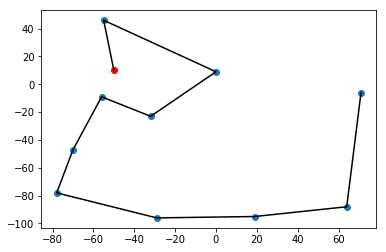

In [14]:
plt.scatter(latitudes, longitude)
plt.scatter([start[0]], [start[1]], color='r')
x = [point[0] for point in  [start] + lines]
y = [point[1] for point in  [start] + lines]
plt.plot(x, y, color='black')

In [104]:
import numpy as np

# 生成距离矩阵     
def gen_distance_arr():
    opt = np.zeros((len(points), len(points)), dtype=float)
    for i in range(len(points)):
        for j in range(len(points)):
            if i == j: opt[i][j] = 0
            opt[i][j] = distance(points[i], points[j])
    return opt

opt = gen_distance_arr()

# 动态规划 
def dp_distance(start, points, choose):
          

In [105]:
distance_arr = gen_distance_arr()

In [106]:
distance_arr

array([[  0.        , 116.77756634, 131.88252348,  93.23089617,
        112.00892822, 135.72398462,  58.25804665,  19.41648784,
         55.21775077,  79.101201  ],
       [116.77756634,   0.        ,  38.47076812,  32.14031736,
         53.71219601, 105.11898021,  58.69412236, 114.01754251,
        118.3300469 ,  83.29465769],
       [131.88252348,  38.47076812,   0.        ,  39.56008089,
         30.08321791, 143.58969322,  79.40403012, 134.46189051,
        146.81280598, 117.51595636],
       [ 93.23089617,  32.14031736,  39.56008089,   0.        ,
         32.64965543, 121.08261642,  40.02499219,  94.9368211 ,
        108.37435121,  83.81527307],
       [112.00892822,  53.71219601,  30.08321791,  32.64965543,
          0.        , 152.89538907,  68.26419266, 118.25819211,
        137.13132392, 116.10770862],
       [135.72398462, 105.11898021, 143.58969322, 121.08261642,
        152.89538907,   0.        , 103.4456379 , 119.03780912,
         91.78235124,  56.88585061],
       [ 5